In [1]:
import sys
import os
import gc
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import torch

torch.Size([6000, 2]) torch.Size([6000]) torch.Size([900, 2]) torch.Size([900])


Data format: 
--------------------------------
type(train_data.data[0]) -> <class 'torch.Tensor'>
train_data.data[0].dtype -> torch.float32

type(train_data.targets) -> <class 'torch.Tensor'>
train_data.targets.dtype -> torch.int64


Access Data by indexing
--------------------------------
train_data[0] -> (torch.Size([2]), torch.Size([]))


max and min values of train_data.data:
--------------------------------
	[(tensor(-10.8020), tensor(12.9405))]





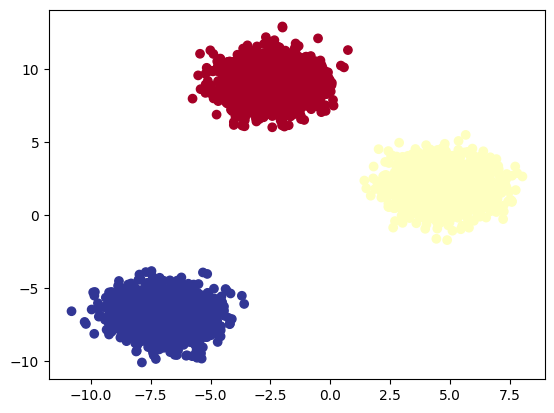

In [2]:
torch.manual_seed(42)
from SyntheticHelperFunctions.GetStandardData import preprocessed_synthetic_data
train_data, test_data = preprocessed_synthetic_data(n_train_samples=6000,
                                                    n_test_samples=900,
                                                    n_features=2,
                                                    n_classes=3,
                                                    random_state=42)

In [3]:
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero
dl = DataLoadersForZero(train_data=train_data,
                    test_data=test_data,
                    data_shape_of_data_point=(2))

In [4]:
BATCH_SIZE = 32
dl.make_dataloaders(batch_size=BATCH_SIZE, 
                    n_train_zeros=6_000, 
                    n_test_zeros=900,
                    label_for_zero=3)

In [5]:
dl.generate_zero_class_dataloader(n_zeros=6_000,
                                batch_size=BATCH_SIZE,
                                label=10)

In [6]:
torch.manual_seed(42)
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer


In [7]:
from Networks.networks import FullyConnectedNet

In [8]:
NUM_DIMENSIONS = 2
NUM_EPOCHS = 100
learning_rate = 0.005

zero_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=11)

simple_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=10)

In [9]:
# Import PyTorch
import torch
from torch import nn

torch.manual_seed(42)
zero_trainer = ZeroTrainer(model=zero_model,
                        number_of_non_zero_classes=3,
                        train_dl=dl.train0_dataloader,
                        test_dl=dl.test_dataloader,
                        purity_fact_dl=dl.test0_dataloader,
                        zero_dl=dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=3,
                        device="cuda" if torch.cuda.is_available() else "cpu",
                        plot_data = dl.combined_test_data,
                        plot_targets = dl.combined_test_targets)

simple_trainer = ZeroTrainer(model=simple_model,
                        number_of_non_zero_classes=3,
                        train_dl=dl.train_dataloader,
                        test_dl=dl.test_dataloader,
                        purity_fact_dl=dl.test0_dataloader,
                        zero_dl=dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=simple_model.parameters(), lr=learning_rate),
                        label_of_zero_class=3,
                        device="cuda" if torch.cuda.is_available() else "cpu",
                        plot_data = dl.combined_test_data,
                        plot_targets = dl.combined_test_targets)


In [10]:
zero_trainer.train(epochs=NUM_EPOCHS)

Training...(epochs: 10)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------


In [11]:
from ZeroHelperFunctions import plots

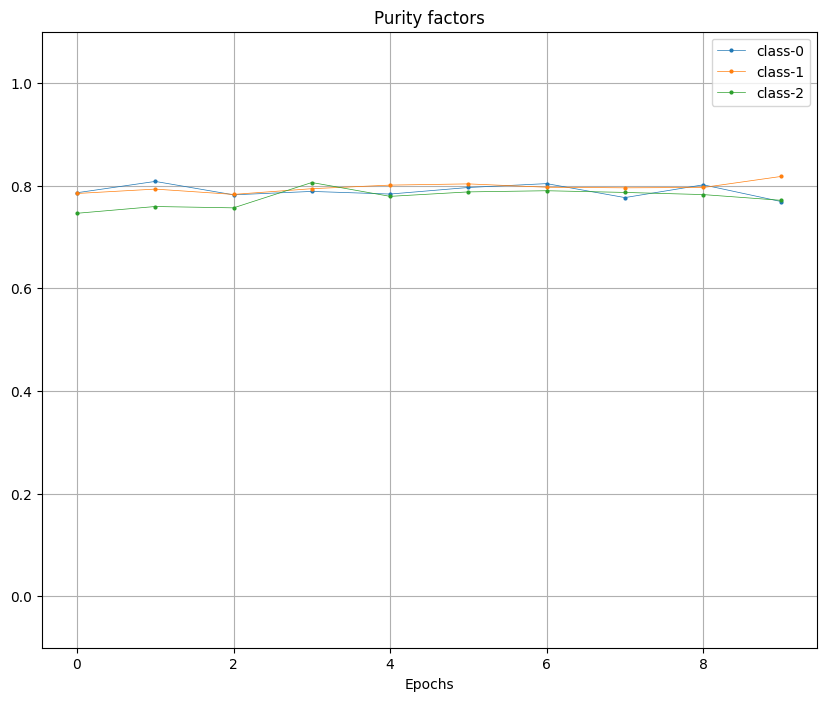

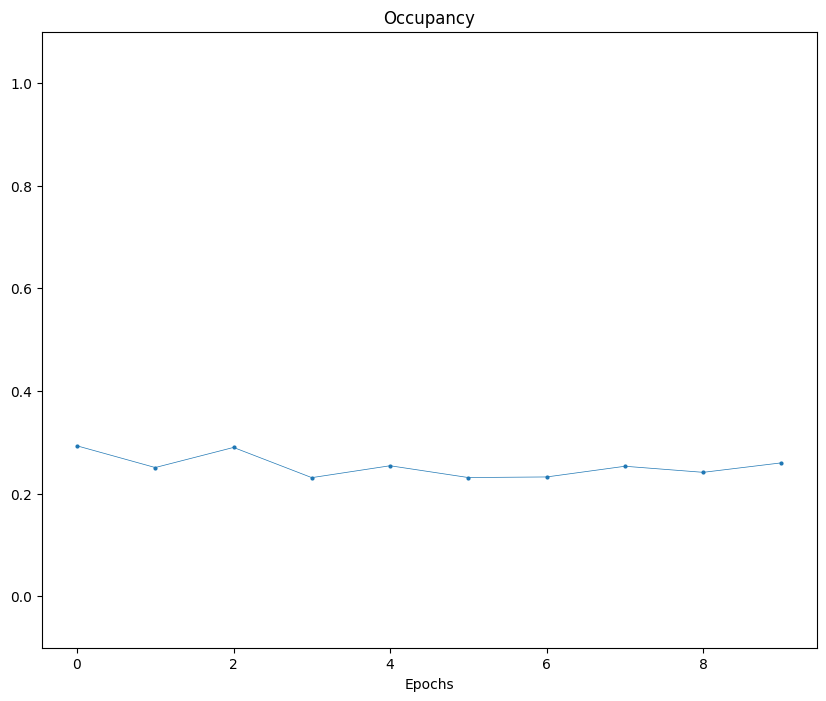

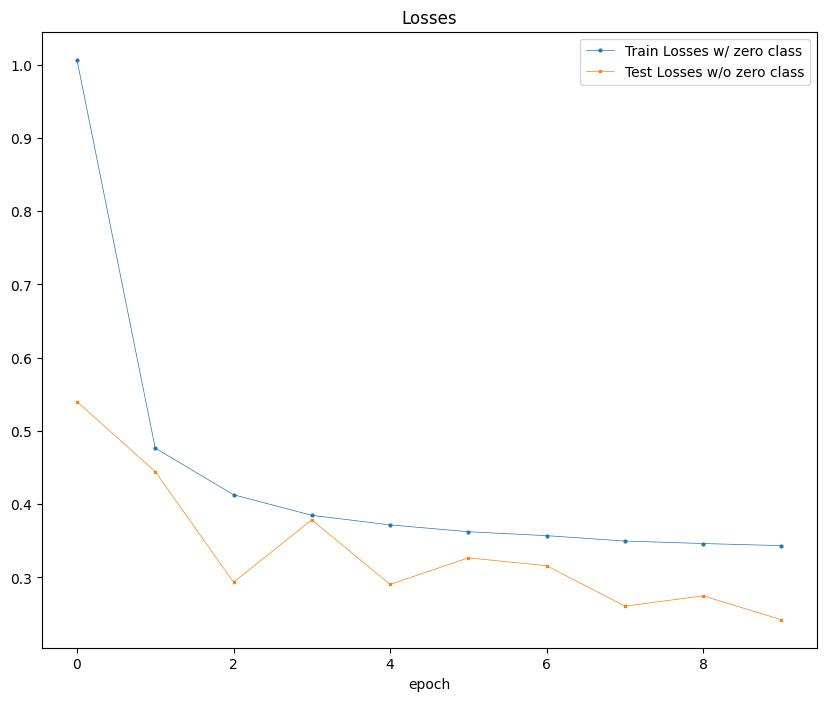

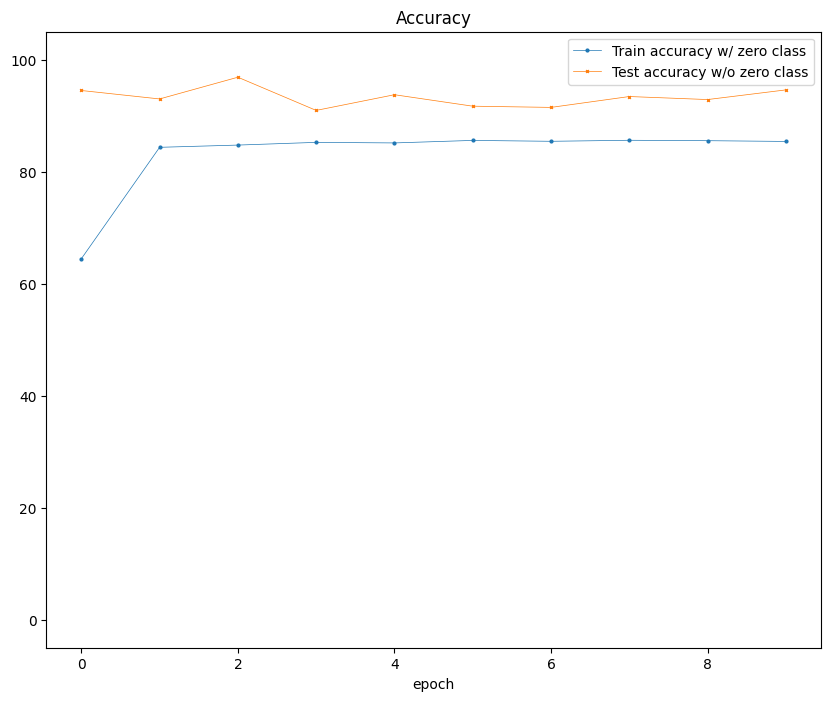

In [12]:
plots.plot_pf(zero_trainer.purities)
plots.plot_of(zero_trainer.occupancy)
plots.plot_train_test_losses(zero_trainer.train_loss,
                             zero_trainer.test_loss)
plots.plot_train_test_accs(zero_trainer.train_acc,
                           zero_trainer.test_acc)

In [13]:
simple_trainer.train(epochs=NUM_EPOCHS,
                    image_dir="test_images")

Training...(epochs: 10)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------


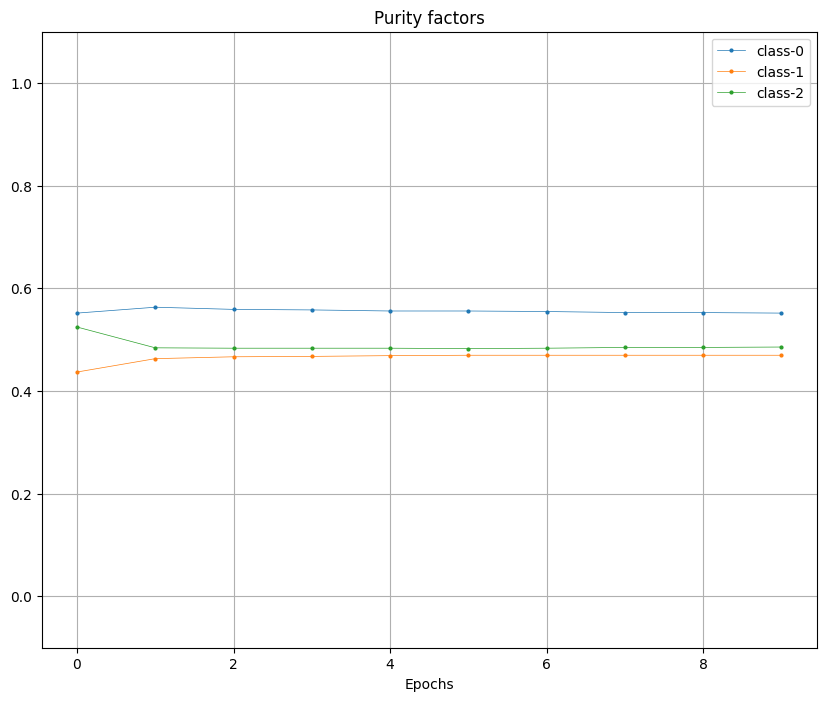

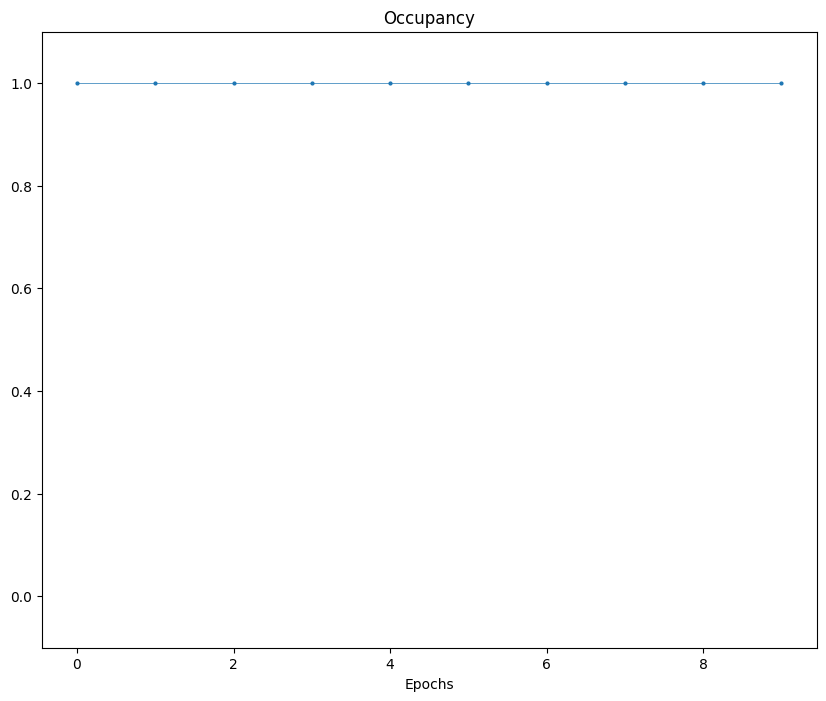

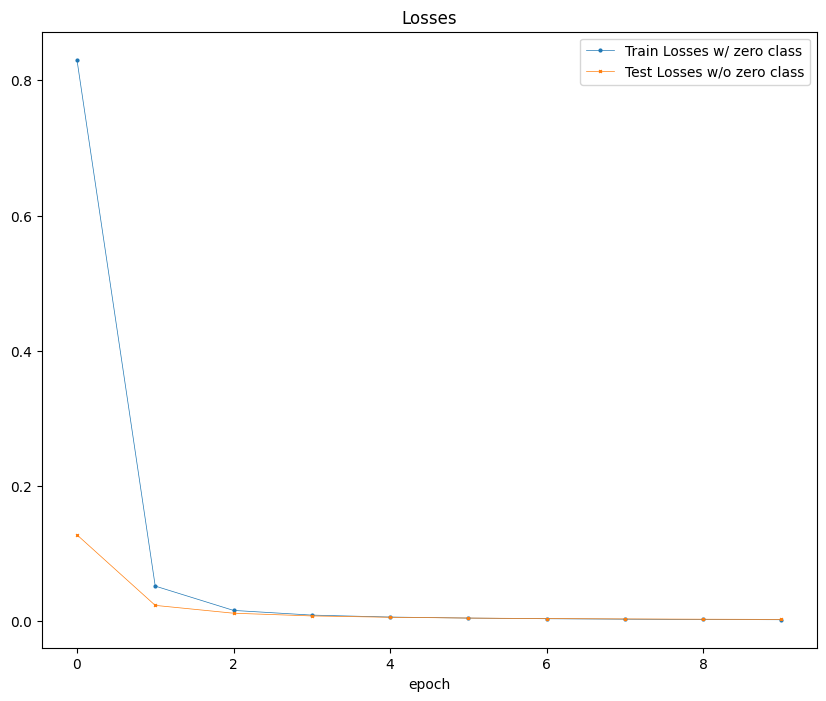

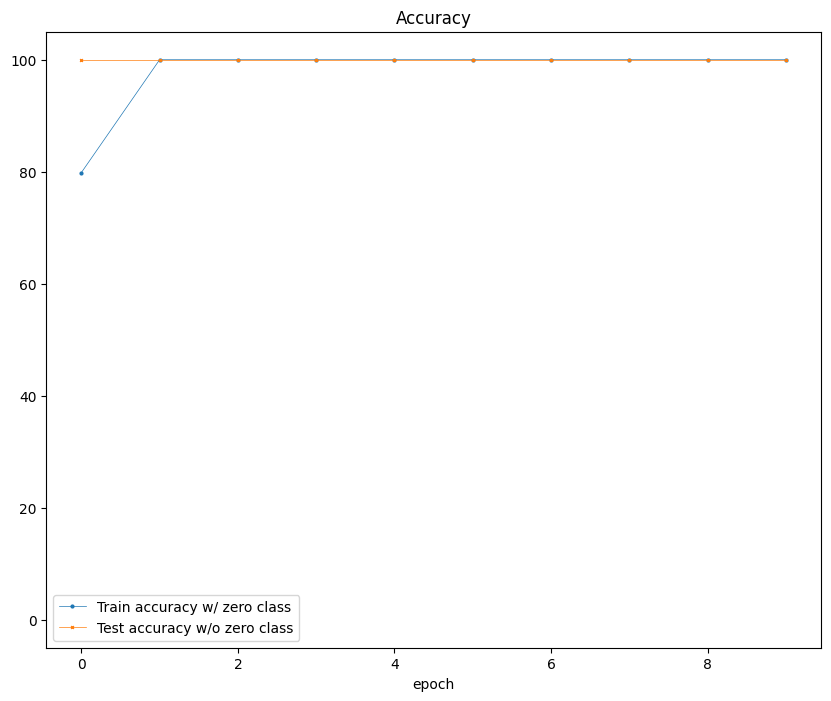

In [14]:
plots.plot_pf(simple_trainer.purities)
plots.plot_of(simple_trainer.occupancy)
plots.plot_train_test_losses(simple_trainer.train_loss, simple_trainer.test_loss)
plots.plot_train_test_accs(simple_trainer.train_acc, simple_trainer.test_acc)

In [15]:
from ZeroHelperFunctions.helper_functions import plot_decision_boundary

In [16]:
# plot_decision_boundary(zero_model, dl.combined_test_data, dl.combined_test_targets)
